In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
from datetime import datetime

In [31]:
df1 = pd.read_csv('cleaned_forest_data.csv')
df2 = pd.read_csv('cleaned_grassland_data.csv')
df = pd.read_csv('cleaned_combined_data.csv')

In [32]:
env_analysis = df.groupby(['Location_Type','Temperature','Humidity','Wind','Sky','Disturbance'])['Initial_Three_Min_Cnt'].sum().reset_index(name='count')

In [33]:
env_analysis['Temperature'] = env_analysis['Temperature'].astype(int)
env_analysis['Humidity'] = env_analysis['Humidity'].astype(int)

In [34]:
env_analysis

,Location_Type,Temperature,Humidity,Wind,Sky,Disturbance,count
0,Forest,11,82,Light air movement (1-3 mph) smoke drifts,Fog,Serious effect on count,2
1,Forest,11,91,Calm (< 1 mph) smoke rises vertically,Clear or Few Clouds,Moderate effect on count,5
2,Forest,14,65,Calm (< 1 mph) smoke rises vertically,Fog,Slight effect on count,6
3,Forest,14,71,Light air movement (1-3 mph) smoke drifts,Clear or Few Clouds,No effect on count,17
4,Forest,14,71,Light air movement (1-3 mph) smoke drifts,Cloudy/Overcast,Slight effect on count,2
...,...,...,...,...,...,...,...
1311,Grassland,35,64,Light breeze (4-7 mph) wind felt on face,Partly Cloudy,No effect on count,5
1312,Grassland,36,37,Light breeze (4-7 mph) wind felt on face,Partly Cloudy,No effect on count,5
1313,Grassland,36,42,Light breeze (4-7 mph) wind felt on face,Partly Cloudy,No effect on count,5
1314,Grassland,36,44,Light air movement (1-3 mph) smoke drifts,Partly Cloudy,Slight effect on count,3


In [ ]:
# Bird observations based on temperature and wind

In [35]:
env_cond1 = df.groupby(['Location_Type','Temperature','Humidity'])['Initial_Three_Min_Cnt'].sum().reset_index(name='count')

In [36]:
env_cond1

,Location_Type,Temperature,Humidity,count
0,Forest,11,82,2
1,Forest,11,91,5
2,Forest,14,65,6
3,Forest,14,71,19
4,Forest,14,75,5
...,...,...,...,...
763,Grassland,35,64,5
764,Grassland,36,37,5
765,Grassland,36,42,5
766,Grassland,36,44,3


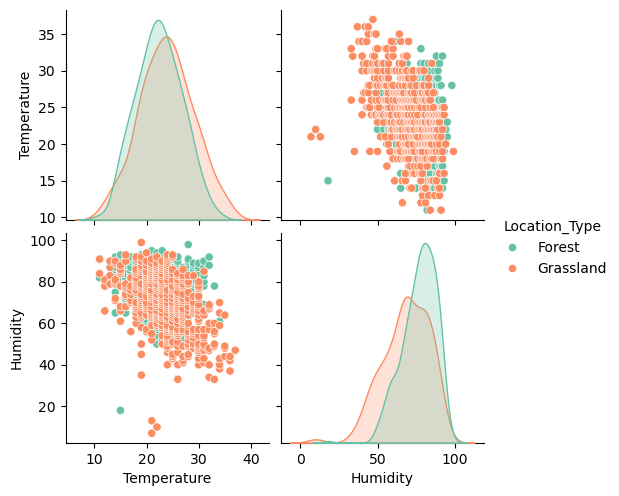

In [49]:
sns.pairplot(
    data = env_cond1,
    vars= ['Temperature','Humidity'],
    hue = 'Location_Type',
    height = 2.5,
    palette = 'Set2',
    kind = 'scatter'
)
plt.show()

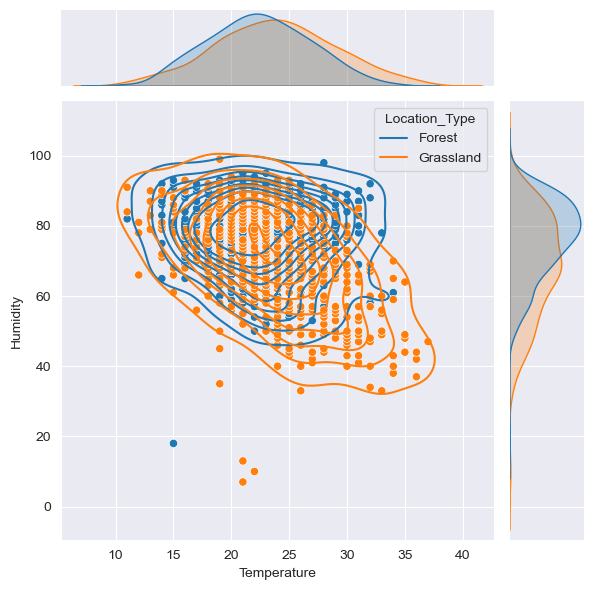

In [60]:
sns.set_style('darkgrid')
g= sns.jointplot(
    data = env_cond1,
    x = env_cond1.Temperature,
    y = env_cond1.Humidity,
    hue = env_cond1.Location_Type,
    kind = 'scatter'
)

g.plot_joint(sns.kdeplot, color='grey')
plt.show()

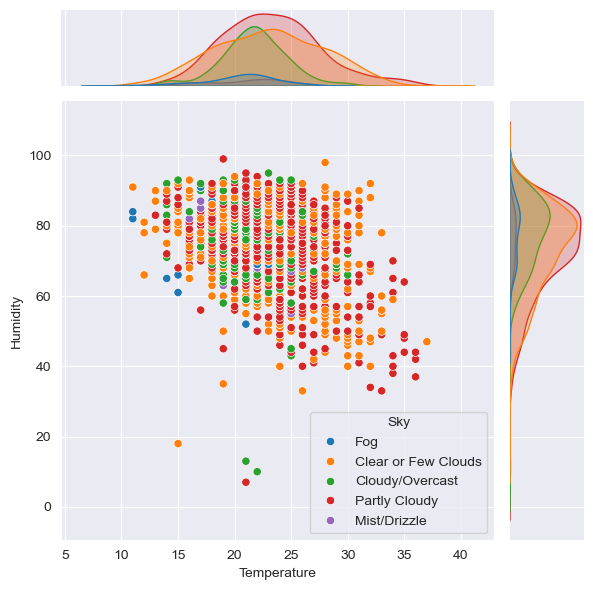

In [62]:
sns.set_style('darkgrid')
g= sns.jointplot(
    data = env_analysis,
    x = env_analysis.Temperature,
    y = env_analysis.Humidity,
    hue = env_analysis.Sky,
    kind = 'scatter'
)

# g.plot_joint(sns.kdeplot, color='grey')
plt.show()

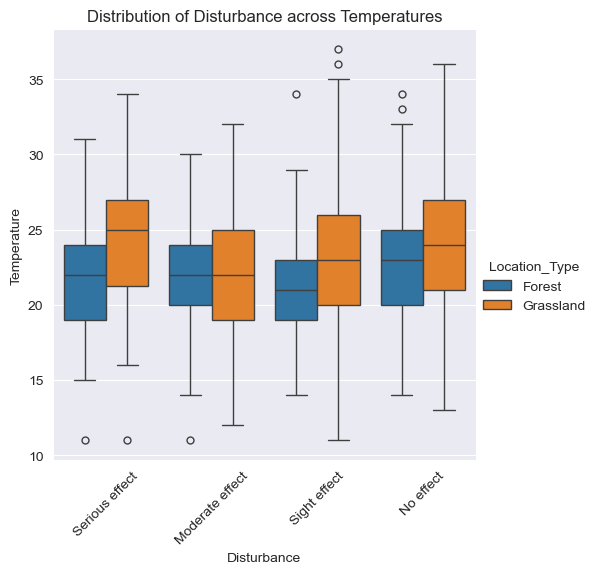

In [87]:
x = ['Serious effect','Moderate effect','Sight effect','No effect']
sns.set_style('darkgrid')
sns.catplot(
    data = env_analysis,
    x = env_analysis.Disturbance,
    y = env_analysis.Temperature,
    hue = env_analysis.Location_Type,
    kind = 'box'
)
plt.xticks(range(len(x)),a,rotation=45)
plt.title('Distribution of Disturbance across Temperatures')
plt.show()

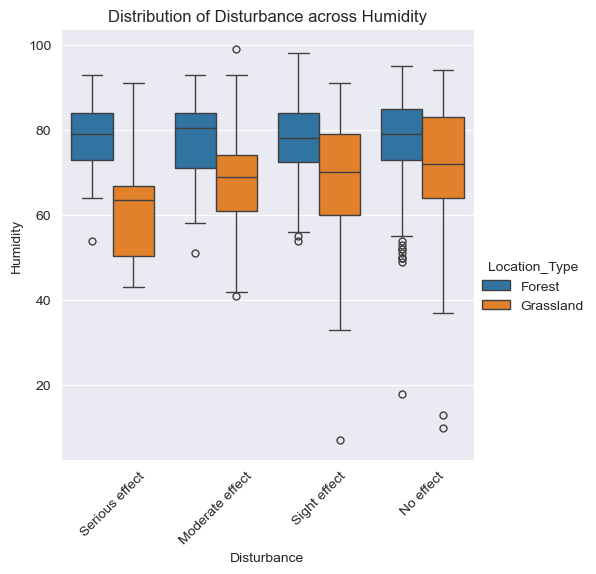

In [86]:
x = ['Serious effect','Moderate effect','Sight effect','No effect']
sns.set_style('darkgrid')
sns.catplot(
    data = env_analysis,
    x = env_analysis.Disturbance,
    y = env_analysis.Humidity,
    hue = env_analysis.Location_Type,
    kind = 'box',
    height = 5
)
plt.xticks(range(len(x)),a,rotation=45)
plt.title('Distribution of Disturbance across Humidity')
plt.show()